In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 11s 0us/step


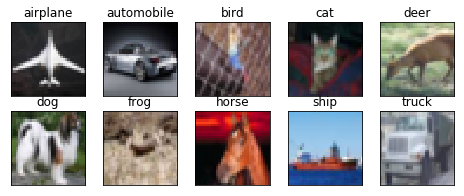

In [4]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers


In [38]:
model = Sequential()

model.add(Convolution2D(24, 3, 3, border_mode='same', input_shape=(32, 32, 3))) ##Receptive_Field=3
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Convolution2D(24, 1, 1)) #Receptive_Field=3
model.add(Activation('relu'))


model.add(Convolution2D(48, 3, 3, border_mode='same')) #Receptive_Field=5
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Convolution2D(48, 1, 1)) #Receptive_Field=5
model.add(Activation('relu'))


model.add(MaxPooling2D(pool_size=(2, 2))) #Receptive_Field=10


model.add(Convolution2D(48, 3, 3, border_mode='same')) #Receptive_Field=12
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(48, 1, 1)) #Receptive_Field=12
model.add(Activation('relu'))



model.add(Convolution2D(96, 3, 3, border_mode='same')) #Receptive_Field=14
model.add(BatchNormalization())
model.add(Activation('relu'))



model.add(Convolution2D(96, 1, 1)) #Receptive_Field=14
model.add(Activation('relu'))



model.add(MaxPooling2D(pool_size=(2, 2))) #Receptive_Field=24



model.add(Convolution2D(96, 3, 3,  border_mode='same')) #Receptive_Field=26
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(96, 1, 1)) #Receptive_Field=26
model.add(Activation('relu'))


model.add(Convolution2D(192, 3, 3, border_mode='same')) #Receptive_Field=28
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(192, 1, 1)) #Receptive_Field=28
model.add(Activation('relu'))


model.add(Convolution2D(10, 8, 8)) #Receptive_Field=


model.add(Flatten())
model.add(Activation('softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (1, 1))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), padding="same")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (1, 1))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Co

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 32, 32, 24)        672       
_________________________________________________________________
batch_normalization_13 (Batc (None, 32, 32, 24)        96        
_________________________________________________________________
activation_27 (Activation)   (None, 32, 32, 24)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 32, 32, 24)        600       
_________________________________________________________________
activation_28 (Activation)   (None, 32, 32, 24)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 32, 32, 48)        10416     
_________________________________________________________________
batch_normalization_14 (Batc (None, 32, 32, 48)        192       
__________

In [40]:
train_features[0].shape

(32, 32, 3)

In [0]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.2, r_1=0.5, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

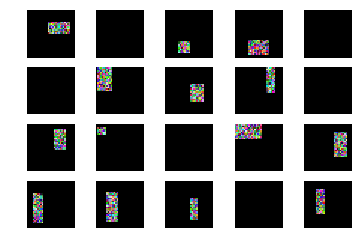

In [44]:

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# from random_eraser import get_random_eraser

cols, rows = 5, 4
img_num = cols * rows

x = np.zeros((img_num, 32, 32, 3), dtype=np.uint8)

eraser = get_random_eraser(pixel_level=True)

for i in range(img_num):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(eraser(x[i]), interpolation="nearest")
    plt.axis('off')

In [0]:
datagen = ImageDataGenerator(#zoom_range=.25, 
                             featurewise_center=True,
                             featurewise_std_normalization=True,
                             rotation_range=20,
                             width_shift_range=0.2,
#                              height_shift_range=0.2,
#                              horizontal_flip=True,                           
#                              vertical_flip=True
                            )

old_gen = datagen.flow(train_features, train_labels, batch_size = 128)



from itertools import chain



def cut_out_gen(batches):
   eraser = get_random_eraser(pixel_level=True)
  
   while True:
        batch_x, batch_y = next(batches)
#         batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_x[i] = eraser(batch_x[i])
        yield (batch_x, batch_y)
    
    
tr_cut_out = cut_out_gen(old_gen)

tr = chain(old_gen,tr_cut_out)

In [46]:
from keras.callbacks import  ModelCheckpoint

filepath="/content/gdrive/My Drive/Colab Notebooks/EVA/9/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
#file path store weights in google drive

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# Store the weights when the validation accuracy increases

from keras.optimizers import Adam
# from keras.callbacks import LearningRateScheduler

# def scheduler(epoch, lr):
#   return round(0.002 * 1/(1 + 0.119 * epoch), 10)


from keras.preprocessing.image import ImageDataGenerator




# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(tr,
                                 steps_per_epoch = 390,
#                                  samples_per_epoch = train_features.shape[0],
                                 nb_epoch = 25, 
                                 callbacks=[checkpoint],#,LearningRateScheduler(scheduler, verbose=1)],
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<itertools..., steps_per_epoch=390, callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=1, epochs=25)`


Epoch 1/25


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


390/390 [==============================] - 44s 112ms/step - loss: 1.4560 - acc: 0.4758 - val_loss: 2.1062 - val_acc: 0.4054

Epoch 00001: val_acc improved from -inf to 0.40540, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/9/epochs:001-val_acc:0.405.hdf5
Epoch 2/25
390/390 [==============================] - 41s 104ms/step - loss: 1.0511 - acc: 0.6240 - val_loss: 1.3468 - val_acc: 0.5453

Epoch 00002: val_acc improved from 0.40540 to 0.54530, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/9/epochs:002-val_acc:0.545.hdf5
Epoch 3/25
390/390 [==============================] - 41s 105ms/step - loss: 0.8789 - acc: 0.6890 - val_loss: 1.1190 - val_acc: 0.6348

Epoch 00003: val_acc improved from 0.54530 to 0.63480, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/9/epochs:003-val_acc:0.635.hdf5
Epoch 4/25
390/390 [==============================] - 40s 104ms/step - loss: 0.7674 - acc: 0.7301 - val_loss: 0.7990 - val_acc: 0.7246

Epoch 00004: val_acc impro

Model took 1027.35 seconds to train


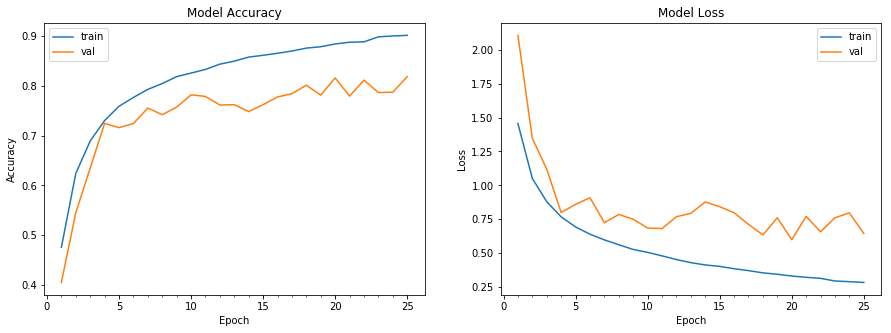

Accuracy on test data is: 81.83


In [47]:
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [48]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/EVA/9/epochs:025-val_acc:0.818.hdf5')

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

score = model.evaluate(test_features, test_labels)#, steps = 10,verbose=0)
print(score[1])

10000/10000 [==============================] - 4s 366us/step
0.8183


In [49]:
print(score[1])

0.8183


In [0]:
from keras.preprocessing import image
# import keras.backend as K
# import numpy as np
import cv2
import sys
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


Original


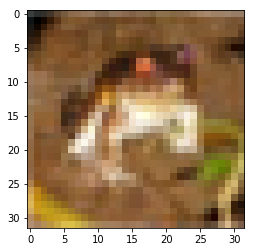

Gradcam


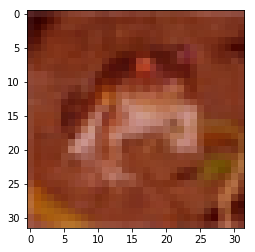

In [55]:
img = train_features[0]
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("conv2d_28")

print(preds)

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(24):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# img = cv2.imread(img_path)
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
# from google.colab.patches import cv2_imshow
# idx = np.where(train_labels[:]==5)[0]
# features_idx = train_features[idx,::]
# img_num = np.random.randint(features_idx.shape[0])
# img = features_idx[img_num]

img = train_features[0]
# img = np.array(img)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
# cv2.imshow(img)
# cv2.imshow(superimposed_img)
# cv2.waitKey(0)

print('Original')
plt.imshow(img)
plt.show()
print('Gradcam')
plt.imshow(superimposed_img)
plt.show()

[[0.0000000e+00 2.3423692e-13 7.4841715e-08 0.0000000e+00 0.0000000e+00
  9.9999988e-01 0.0000000e+00 3.1004843e-13 0.0000000e+00 0.0000000e+00]]
Original


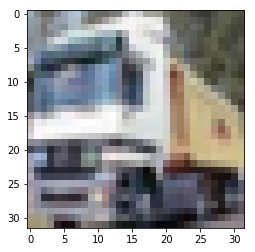

Gradcam


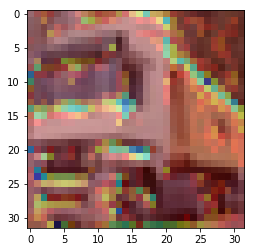

In [56]:
img = train_features[1]
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("conv2d_28")

print(preds)

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(24):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# img = cv2.imread(img_path)
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
# from google.colab.patches import cv2_imshow
# idx = np.where(train_labels[:]==5)[0]
# features_idx = train_features[idx,::]
# img_num = np.random.randint(features_idx.shape[0])
# img = features_idx[img_num]

img = train_features[1]
# img = np.array(img)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
# cv2.imshow(img)
# cv2.imshow(superimposed_img)
# cv2.waitKey(0)

print('Original')
plt.imshow(img)
plt.show()
print('Gradcam')
plt.imshow(superimposed_img)
plt.show()

[[0.0000000e+00 4.1488199e-03 9.9585116e-01 0.0000000e+00 0.0000000e+00
  9.3328380e-17 0.0000000e+00 4.4555967e-21 0.0000000e+00 0.0000000e+00]]
Original


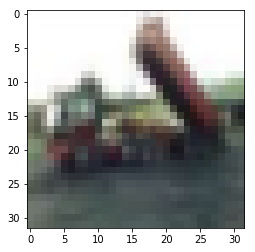

Gradcam


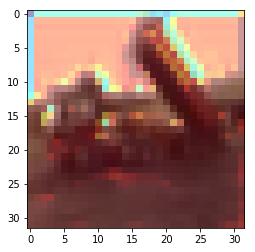

In [57]:
img = train_features[2]
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("conv2d_28")

print(preds)

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(24):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# img = cv2.imread(img_path)
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
# from google.colab.patches import cv2_imshow
# idx = np.where(train_labels[:]==5)[0]
# features_idx = train_features[idx,::]
# img_num = np.random.randint(features_idx.shape[0])
# img = features_idx[img_num]

img = train_features[2]
# img = np.array(img)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
# cv2.imshow(img)
# cv2.imshow(superimposed_img)
# cv2.waitKey(0)

print('Original')
plt.imshow(img)
plt.show()
print('Gradcam')
plt.imshow(superimposed_img)
plt.show()

[[0.000000e+00 6.004524e-05 0.000000e+00 0.000000e+00 0.000000e+00
  0.000000e+00 0.000000e+00 9.999399e-01 0.000000e+00 0.000000e+00]]
Original


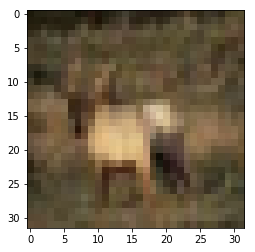

Gradcam


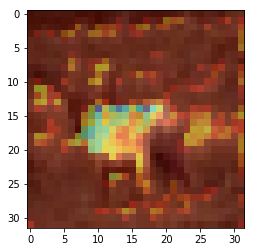

In [58]:
img = train_features[3]
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("conv2d_28")

print(preds)

grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(24):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
    
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

# img = cv2.imread(img_path)
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
# from google.colab.patches import cv2_imshow
# idx = np.where(train_labels[:]==5)[0]
# features_idx = train_features[idx,::]
# img_num = np.random.randint(features_idx.shape[0])
# img = features_idx[img_num]

img = train_features[3]
# img = np.array(img)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
# cv2.imshow(img)
# cv2.imshow(superimposed_img)
# cv2.waitKey(0)

print('Original')
plt.imshow(img)
plt.show()
print('Gradcam')
plt.imshow(superimposed_img)
plt.show()